In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [ ]:
file_path = "week1/results/task2_results_normalization.txt" 
data = []

with open(file_path, "r") as f:
    lines = f.readlines()
    for line in lines[2:]: 
        parts = line.split()
        if len(parts) == 3:
            alpha, rho, mAP = map(float, parts)
            data.append([alpha, rho, mAP])

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Per utilitzar els colors de la presentació
custom_pal = sns.color_palette(["#274857", "#6fbeae"]) 
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", ["#6fbeae", "#274857"])  

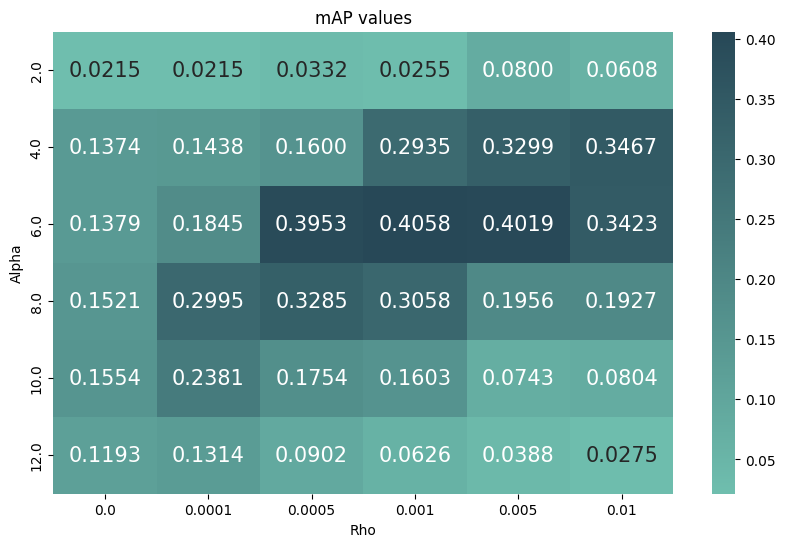

In [ ]:
df = pd.DataFrame(data, columns=["Alpha", "Rho", "mAP"])

# Pivot the data for heatmap
df_pivot = df.pivot(index="Alpha", columns="Rho", values="mAP")

plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, cmap=custom_cmap, fmt=".4f", annot_kws={"size": 15})
plt.title("mAP values")
plt.xlabel("Rho")
plt.ylabel("Alpha")
plt.show()

In [ ]:
file_path = "week1/results/task2_results_alpa7.txt" 
data = []

with open(file_path, "r") as f:
    lines = f.readlines()
    for line in lines[2:]: 
        parts = line.split()
        if len(parts) == 2:
            rho, mAP = map(float, parts)
            data.append([rho, mAP])

df_alpha7 = pd.DataFrame(data, columns=["Rho", "mAP"])

In [26]:
df_alpha7

,Rho,mAP
0,0.0000,0.1237
1,0.0001,0.2276
2,0.0005,0.3680
3,0.0010,0.3698
4,0.0050,0.2838
5,0.0100,0.2987


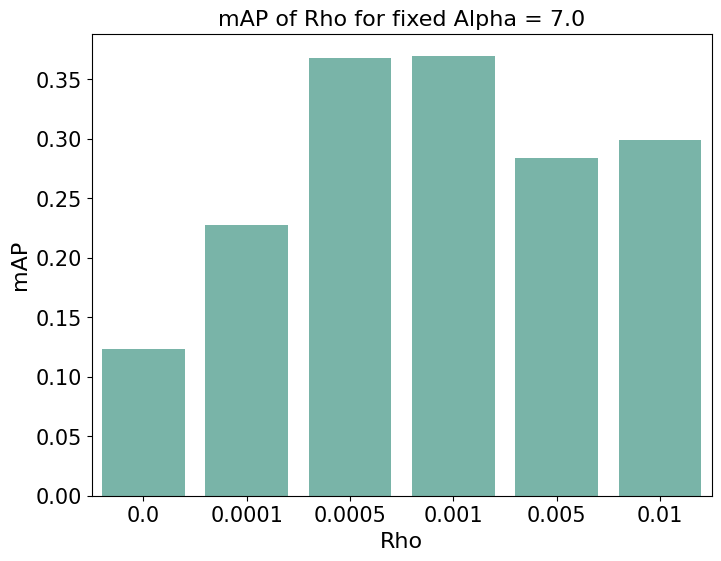

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Rho", y="mAP", data=df_alpha7, color="#6fbeae")
plt.title("mAP of Rho for fixed Alpha = 7.0", fontsize=16)
plt.xlabel("Rho", fontsize=16)
plt.ylabel("mAP", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
file_path = "week1/results/task1_results.txt"  
data = []

with open(file_path, "r") as f:
    lines = f.readlines()
    for line in lines[2:]: 
        parts = line.split()
        if len(parts) == 3:
            alpha, rho, mAP = map(float, parts)
            data.append([alpha, mAP])

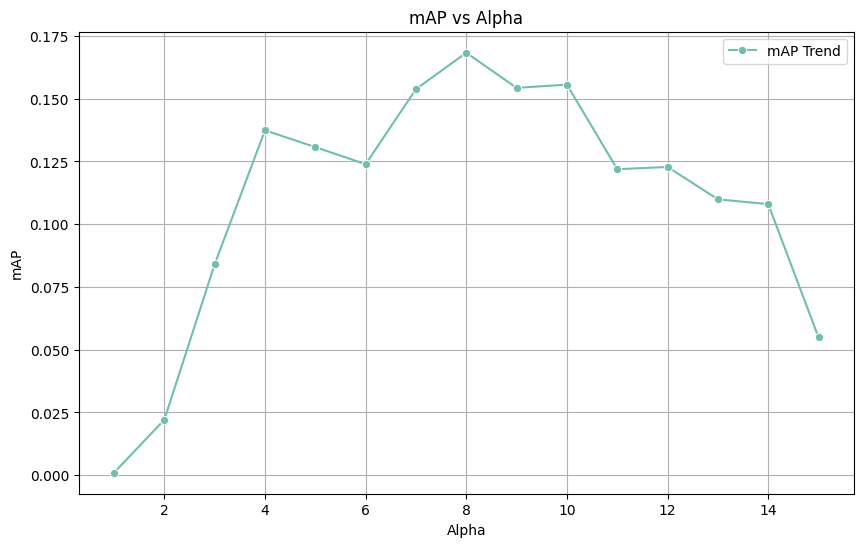

In [ ]:
df = pd.DataFrame(data, columns=["Alpha", "mAP"])

#Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Alpha", y="mAP", data=df, marker="o", label="mAP Trend", color="#6fbeae")
plt.title("mAP vs Alpha")
plt.xlabel("Alpha")
plt.ylabel("mAP")
plt.legend()
plt.grid()
plt.show()


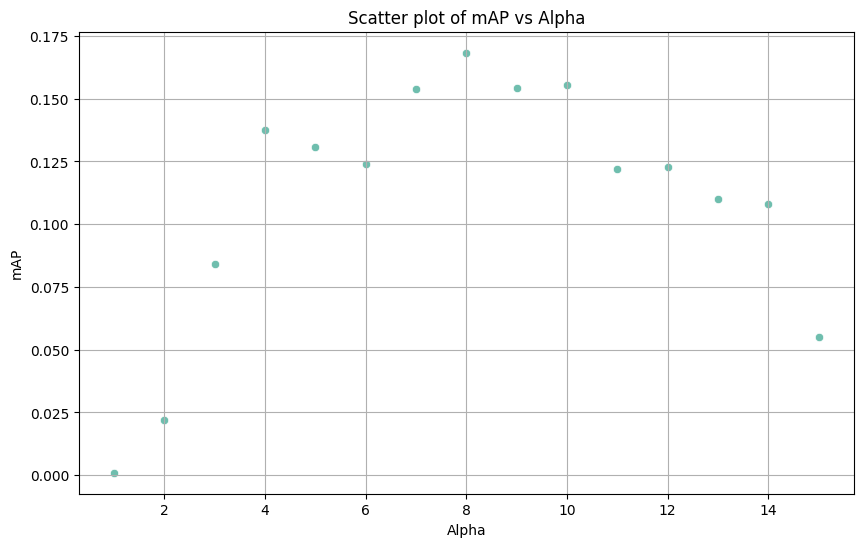

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Alpha", y="mAP", data=df, color="#6fbeae")
plt.title("Scatter plot of mAP vs Alpha")
plt.xlabel("Alpha")
plt.ylabel("mAP")
plt.grid()
plt.show()


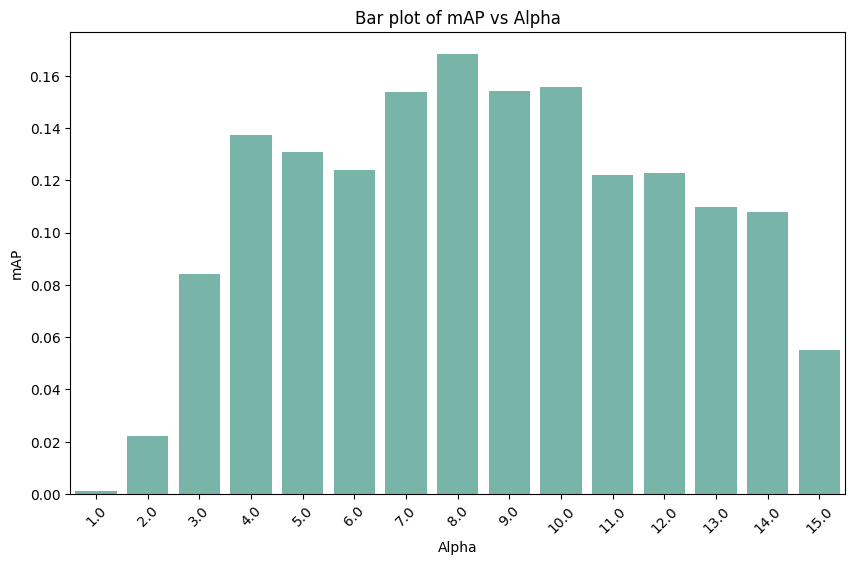

In [82]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Alpha", y="mAP", data=df, color="#6fbeae")
plt.title("Bar plot of mAP vs Alpha")
plt.xlabel("Alpha")
plt.ylabel("mAP")
plt.xticks(rotation=45)
plt.show()

In [ ]:
frame_mAP_scores_1 = np.loadtxt("week1/results/frame_mAPs_1col.txt")
frame_mAP_scores_2 = np.loadtxt("week1/results/frame_mAPs_task2.txt")

In [ ]:
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

window_size = 30  
smooth_mAP_1 = moving_average(frame_mAP_scores_1, window_size)
smooth_mAP_2 = moving_average(frame_mAP_scores_2, window_size)

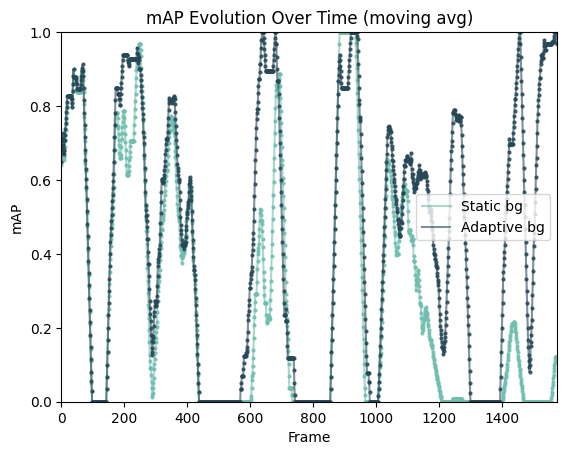

In [ ]:

# Custom colors
dot_color_1 = '#6fbeae'
line_color_1 = '#6fbeae'

dot_color_2 = '#274857'
line_color_2 = '#274857'

fig, ax = plt.subplots()
ax.set_xlim(0, max(len(smooth_mAP_1), len(smooth_mAP_2)))
ax.set_ylim(0, 1)  
ax.set_xlabel("Frame")
ax.set_ylabel("mAP")
ax.set_title("mAP Evolution Over Time (moving avg)")

# Initialize scatter plot and line for both videos
sc1, = ax.plot([], [], marker='o', linestyle='', color=dot_color_1, markersize=2, alpha=0.8)
line1, = ax.plot([], [], linestyle='-', color=line_color_1, linewidth=1.5, alpha=0.6, label="Static bg")

sc2, = ax.plot([], [], marker='o', linestyle='', color=dot_color_2, markersize=2, alpha=0.8)
line2, = ax.plot([], [], linestyle='-', color=line_color_2, linewidth=1.5, alpha=0.6, label="Adaptive bg")

ax.legend()  

# Update function for animation
def update(frame):
    x_data = list(range(frame + 1))
    
    y_data_1 = smooth_mAP_1[:frame + 1]
    sc1.set_data(x_data, y_data_1)
    line1.set_data(x_data, y_data_1)

    y_data_2 = smooth_mAP_2[:frame + 1]
    sc2.set_data(x_data, y_data_2)
    line2.set_data(x_data, y_data_2)
    
    return sc1, line1, sc2, line2

# Create animation
ani = animation.FuncAnimation(fig, update, frames=max(len(smooth_mAP_1), len(smooth_mAP_2)), interval=50, blit=True)

# Save as video
ani.save("mAP_evolution_moving_avg_w30.mp4", writer="ffmpeg", fps=10)

plt.show()
